<a href="https://colab.research.google.com/github/pardiwalas/cmsc320-final-project/blob/main/CMSC320_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title
<b>Spring 2025 Data Science Project</b><br>
<b>Sravya Patibandla, Stuti Pardiwala, Valerie Lin</b>

Contributions:
<ul>
  <li>Sravya Patibandla: TBD</li>
  <li>Stuti Pardiwala: TBD</li>
  <li>Valerie Lin: TBD</li>
</ul>

## Introduction

<i>The introduction should motivate your work: what is your topic? What question(s) are you trying to answer with your analysis? Why is answering those questions important?</i>

## Data Curation

<i>Cite the source(s) of your data. Explain what it is. Transform the data so that it is ready for analysis. For example, set up a database and use SQL to query for data, or organize a pandas DataFrame.</i>

<i>Draft: We will be looking at the CONLIT Dataset of Contemporary Literature, which contains data on around 2,700 different books.</i>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np

conlit_df = pd.read_csv("CONLIT_META.csv")
conlit_df

,ID,Category,Language,Genre,Genre2,Pubdate,Author_Last,Author_First,Work_Title,Translation,...,tuldava_score,event_count,speed_avg,circuitousness,speed_min,volume,goodreads_avg,total_ratings,goodreads_URL,Probability1P
0,[Heist Society 2] Uncommon Criminals - Ally Ca...,FIC,English,YA,NaN,2011,Carter,Ally,UncommonCriminals,NaN,...,3.310712,4796,-2.4068,0.17579,-2.5826,-3.0142,4.13,42102.0,https://www.goodreads.com/search?q=Ally+Carter...,0.0
1,"2001_2011_Wilson,RobertCharles_TheChronoliths_...",FIC,English,SF,NaN,2001,Wilson,RobertCharles,TheChronoliths,NaN,...,3.704009,4039,-2.2599,0.23048,-2.4904,-2.9521,3.67,5136.0,https://www.goodreads.com/search?q=+The+Chrono...,1.0
2,"2001_Martel,Yann_LifeofPi_BS.txt",FIC,English,BS,NaN,2001,Yann,Martel,LifeofPi,NaN,...,3.460664,5129,-2.1545,0.15124,-2.3057,-2.8300,3.93,1480498.0,https://www.goodreads.com/search?q=+Lifeof+Pi,1.0
3,"2002_2011_Anderson,MT_Feed_SF.txt",FIC,English,SF,YA,2002,Anderson,MT,Feed,NaN,...,2.909212,3479,-2.3438,0.13506,-2.4788,-2.8989,3.56,61346.0,https://www.goodreads.com/search?q=MT+Anderson...,1.0
4,"2002_Baker,Jo_Offcomer_CT.txt",FIC,English,NYT,NaN,2002,Baker,Jo,Offcomer,NaN,...,3.183173,6314,-2.1152,0.26496,-2.3801,-2.8866,2.58,145.0,https://www.goodreads.com/search?q=Jo+Baker+Of...,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2749,"Woman Behind the New Deal, The - Kirstin Downe...",NON,English,BIO,NaN,2009,Downey,Kristin,TheWomanBehindtheNewDealTheLifeandLegacyofFran...,NaN,...,4.886094,5310,-2.2453,0.17297,-2.4183,-2.9783,4.22,1798.0,https://www.goodreads.com/search?q=+The+Woman+...,0.0
2750,"Woman of No Importance, A - Sonia Purnell.txt",NON,English,BIO,NaN,2019,Purnell,Sonia,AWomanofNoImportance,NaN,...,5.002344,3561,-2.4003,0.14741,-2.5477,-3.0649,4.12,33198.0,https://www.goodreads.com/search?q=+A+Womanof+...,0.0
2751,"Woodrow Wilson - John Milton Cooper, Jr_.txt",NON,English,BIO,NaN,2009,CooperJr,JohnMilton,WoodrowWilson,NaN,...,5.219821,8682,-2.3632,0.16511,-2.5283,-3.2655,3.82,6075.0,https://www.goodreads.com/search?q=+Woodrow+Wi...,0.0
2752,You Never Forget Your First - Alexis Coe.txt,NON,English,BIO,NaN,2020,Coe,Alexis,YouNeverForgetYourFirst,NaN,...,4.938083,1458,-2.2849,0.12859,-2.4135,-2.8017,3.75,10699.0,https://www.goodreads.com/search?q=Alexis+Coe+...,0.0


## Exploratory Data Analysis

### Data Cleaning

Let's start by checking out our data's shape, columns, and data types.

In [2]:
print(conlit_df.shape)
display(conlit_df.dtypes)

(2754, 30)


,0
ID,object
Category,object
Language,object
Genre,object
Genre2,object
Pubdate,int64
Author_Last,object
Author_First,object
Work_Title,object
Translation,object


There are a few variables that seem like common sense to remove, including Author_Last, Author_First, Work_Title, and goodreads_URL. We also expect ID, Work_Title, and goodreads_URL to be unique. Let's check if that is the case.

In [3]:
print("\t\tUnique\tNot null")
for col in ["ID", "Work_Title", "goodreads_URL"]:
  print("{:16}{:6}{:10}".format(col, conlit_df[col].nunique(), conlit_df[col].notnull().sum()))

		Unique	Not null
ID                2754      2754
Work_Title        2742      2754
goodreads_URL     2752      2754


It looks like ID is fine, but Work_Title and goodreads_URL are not actually unique! Let's figure out which entries are duplicates.

In [4]:
title_dups = conlit_df["Work_Title"].value_counts()[lambda x: x > 1]
url_dups = conlit_df["goodreads_URL"].value_counts()[lambda x: x > 1]
title_dup_data = conlit_df[conlit_df["Work_Title"].isin(title_dups.index)]
url_dup_data = conlit_df[conlit_df["goodreads_URL"].isin(url_dups.index)]

display(title_dup_data.sort_values(by="Work_Title"))
display(url_dup_data.sort_values(by="goodreads_URL"))

,ID,Category,Language,Genre,Genre2,Pubdate,Author_Last,Author_First,Work_Title,Translation,...,tuldava_score,event_count,speed_avg,circuitousness,speed_min,volume,goodreads_avg,total_ratings,goodreads_URL,Probability1P
1675,"2015_James,Marlon_ABriefHistoryofSevenKillings...",FIC,English,PW,NaN,2015,James,Marlon,ABriefHistoryofSevenKillings,NaN,...,3.271848,7778,-2.2047,0.259670,-2.4643,-3.2342,3.89,31346.0,https://www.goodreads.com/search?q=+A+Brief+Hi...,1.0
1246,"2014_James,Marlon_ABriefHistoryofSevenKillings...",FIC,English,NYT,NaN,2014,James,Marlon,ABriefHistoryofSevenKillings,NaN,...,3.271848,7778,-2.2047,0.259670,-2.4643,-3.2342,3.89,31346.0,https://www.goodreads.com/search?q=+A+Brief+Hi...,1.0
26,"2005_Gardner,Lisa_Alone_BS.txt",FIC,English,BS,NaN,2005,Lisa,Gardner,Alone,NaN,...,3.207248,6911,-2.1546,0.286570,-2.4412,-2.9514,3.97,60106.0,https://www.goodreads.com/search?q=Gardner+Lis...,0.0
1162,"2014_Elliot,Kendra_Alone_ROM.txt",FIC,English,ROM,NaN,2014,Elliot,Kendra,Alone,NaN,...,3.038173,6714,-2.2285,0.233970,-2.4624,-2.9493,4.19,15408.0,https://www.goodreads.com/search?q=Kendra+Elli...,0.0
214,"2009_McDougall,Christopher_BorntoRun_ME.txt",NON,English,MEM,NaN,2009,McDougall,Christopher,BorntoRun,NaN,...,4.133225,4324,-2.3078,0.130710,-2.4386,-2.9118,4.30,189518.0,https://www.goodreads.com/search?q=+Bornto+Run,1.0
2318,"2016_Springsteen,Bruce_BorntoRun_ME.txt",NON,English,MEM,NaN,2016,Springsteen,Bruce,BorntoRun,NaN,...,3.944569,5658,-2.3182,0.175590,-2.4938,-3.0860,4.30,189518.0,https://www.goodreads.com/search?q=+Bornto+Run,1.0
877,"2013_Howey,Hugh_Dust_SF.txt",FIC,English,SF,NaN,2013,Howey,Hugh,Dust,NaN,...,3.259251,10530,-2.2122,0.247280,-2.4595,-3.0052,4.25,73870.0,https://www.goodreads.com/search?q=Hugh+Howey+...,0.0
829,"2013_Cornwell,Patricia_Dust_MY.txt",FIC,English,MY,NaN,2013,Cornwell,Patricia,Dust,NaN,...,3.650265,6141,-2.3019,0.196510,-2.4984,-3.0552,3.63,18699.0,https://www.goodreads.com/search?q=Patricia+Co...,1.0
1589,"2015_Douglas,Penelope_FallingAway_ROM.txt",FIC,English,ROM,NaN,2015,Douglas,Penelope,FallingAway,NaN,...,2.983492,12586,-2.3304,0.234100,-2.5645,-3.1102,3.96,148679.0,https://www.goodreads.com/search?q=Penelope+Do...,1.0
1476,"2014_Wilder,Jasinda_FallingAway_ROM.txt",FIC,English,ROM,NaN,2014,Wilder,Jasinda,FallingAway,NaN,...,3.016028,6468,-2.1719,0.252430,-2.4243,-2.9148,4.16,3217.0,https://www.goodreads.com/search?q=Jasinda+Wil...,1.0


,ID,Category,Language,Genre,Genre2,Pubdate,Author_Last,Author_First,Work_Title,Translation,...,tuldava_score,event_count,speed_avg,circuitousness,speed_min,volume,goodreads_avg,total_ratings,goodreads_URL,Probability1P
1246,"2014_James,Marlon_ABriefHistoryofSevenKillings...",FIC,English,NYT,NaN,2014,James,Marlon,ABriefHistoryofSevenKillings,NaN,...,3.271848,7778,-2.2047,0.25967,-2.4643,-3.2342,3.89,31346.0,https://www.goodreads.com/search?q=+A+Brief+Hi...,1.0
1675,"2015_James,Marlon_ABriefHistoryofSevenKillings...",FIC,English,PW,NaN,2015,James,Marlon,ABriefHistoryofSevenKillings,NaN,...,3.271848,7778,-2.2047,0.25967,-2.4643,-3.2342,3.89,31346.0,https://www.goodreads.com/search?q=+A+Brief+Hi...,1.0
214,"2009_McDougall,Christopher_BorntoRun_ME.txt",NON,English,MEM,NaN,2009,McDougall,Christopher,BorntoRun,NaN,...,4.133225,4324,-2.3078,0.13071,-2.4386,-2.9118,4.30,189518.0,https://www.goodreads.com/search?q=+Bornto+Run,1.0
2318,"2016_Springsteen,Bruce_BorntoRun_ME.txt",NON,English,MEM,NaN,2016,Springsteen,Bruce,BorntoRun,NaN,...,3.944569,5658,-2.3182,0.17559,-2.4938,-3.0860,4.30,189518.0,https://www.goodreads.com/search?q=+Bornto+Run,1.0


Most instances are still distinct books; the only true duplicate is <i>A Brief History of Seven Killings</i> by Marlon James. We can remove the older entry (2014) and then drop the columns mentioned earlier.

In [5]:
conlit_df.drop(1246, inplace=True)
conlit_df.drop(["Author_Last", "Author_First", "Work_Title", "goodreads_URL"], axis=1, inplace=True)

Next, let's take a closer look at our categorical data.

In [6]:
categories = ["Category", "Language", "Genre", "Genre2", "Translation", "PubHouse",
              "Prize", "WinnerShortlist", "Author_Gender", "Author_Nationality"]

for col in categories:
  display(conlit_df[col].value_counts())

,count
Category,
FIC,1933
NON,820


,count
Language,
English,2753


,count
Genre,
NYT,418
PW,258
BS,249
MY,234
MEM,229
SF,223
ROM,208
HIST,205
BIO,193


,count
Genre2,
YA,50
NYT,34
MY,7
SF,5
ROM,2
MEM,1
BS,1


,count
Translation,
French,6
Swedish,4
German,2
Norwegian,2
Danish,1


,count
PubHouse,
HarperCollins,42
RandomHouseCa,27
RandomHouse,23
Doubleday,20
PenguinGroupUSA,18
...,...
UniversityofIllinoisPress,1
Tor,1
BaenBooks,1


,count
Prize,
ScotiabankGillerPrize,52
PEN/FaulknerAwardforFiction,51
TheManBookerPrize,47
TheNationalBookAwards,41
GovernorGeneralLiteraryAwardforfiction,40
NationalBookAwards,9
GovernerGeneral's,9
ManBooker,9


,count
WinnerShortlist,
Shortlist,208
Winner,50


,count
Author_Gender,
M,1374
F,1370
o,8


,count
Author_Nationality,
US,932
Canada,148
UK,144
Australia,18
Ireland,11
...,...
Germany/UK,1
CanadaIreland,1
India/Canada,1


The following columns seem to be skewed/uniform or have lots of missing data:
* Language
* Genre2
* Translation
* PubHouse
* Author_Nationality

We can go ahead and drop these columns.

(yap about Prize and WinnerShortlist)

In [7]:
cols_to_drop = ["Language", "Genre2", "Translation", "PubHouse", "Prize", "Author_Nationality"]
conlit_df.drop(columns=cols_to_drop, inplace=True)
conlit_df["WinnerShortlist"] = conlit_df["WinnerShortlist"].fillna("NoPrize")

We can then look for remaining instances of missing data (qualitative or quantitative).

In [8]:
conlit_df.isna().sum()[lambda x: x != 0]

,0
Author_Gender,1
protagonist_concentration,2
speed_avg,1
circuitousness,1
speed_min,1
volume,1
goodreads_avg,1
total_ratings,1


Since there's only 1 or 2 missing entries per column, we can apply listwise deletion and just remove any problematic rows.

In [9]:
listwise_deletion = ["Author_Gender", "protagonist_concentration", "speed_avg",
                     "circuitousness", "speed_min", "volume", "goodreads_avg",
                     "total_ratings"]

conlit_df.dropna(subset=listwise_deletion, inplace=True)

Also, to improve readability, we should convert the genre abbreviations to full descriptions.

In [10]:
genre_mapping = {
    "BIO": "Biography",
    "BS": "Bestseller Fiction",
    "HIST": "History",
    "MEM": "Memoir",
    "MID": "Middle School",
    "MIX": "Assorted Nonfiction",
    "MY": "Mystery",
    "NYT": "NY Times Reviewed",
    "PW": "Prize-listed Fiction",
    "ROM": "Romance",
    "SF": "Science Fiction",
    "YA": "Young Adult"
}

conlit_df["Genre"] = conlit_df["Genre"].map(genre_mapping)

Finally, let's explore our quantitative data.

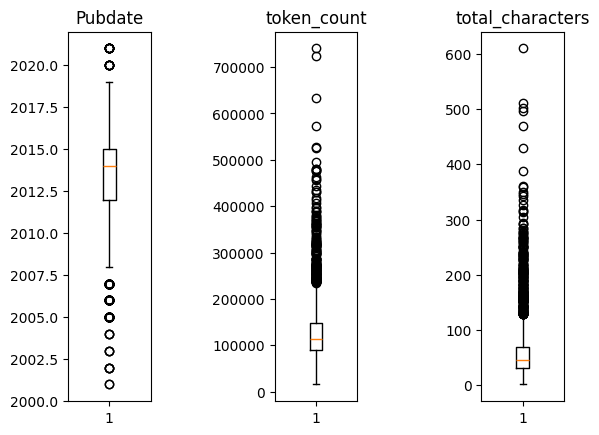

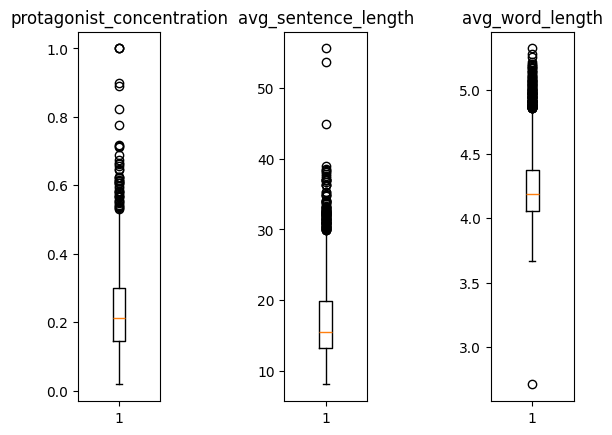

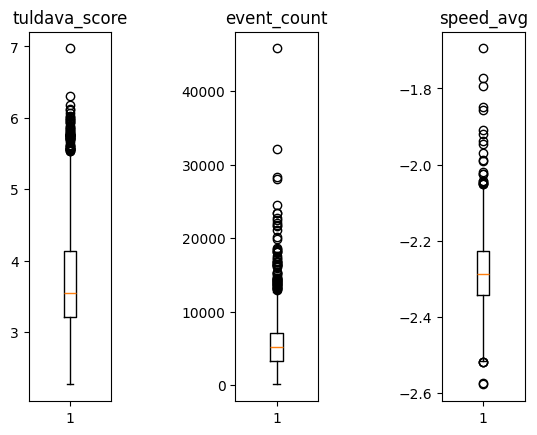

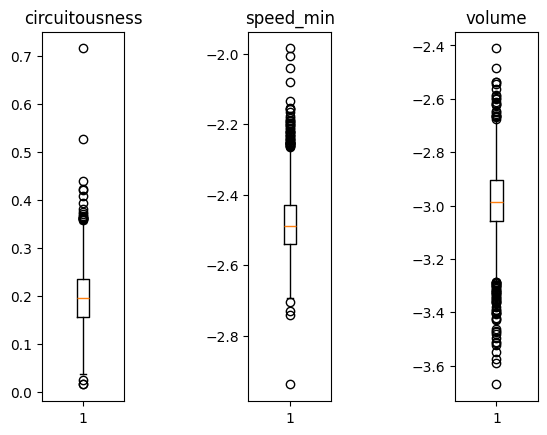

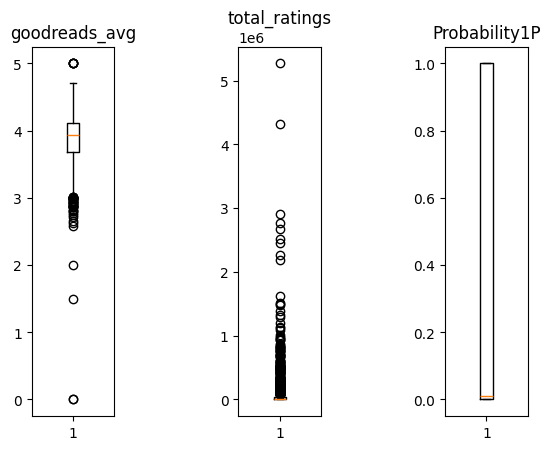

In [11]:
quantitative_cols = ["Pubdate", "token_count", "total_characters", "protagonist_concentration",
                     "avg_sentence_length", "avg_word_length", "tuldava_score", "event_count",
                     "speed_avg", "circuitousness", "speed_min", "volume", "goodreads_avg",
                     "total_ratings", "Probability1P"]

num_rows = 5
num_cols = 3

# display boxplots a few at a time to avoid obnoxiously long output
for row in range(num_rows):
  for col in range(num_cols):
    plt.subplot(1, num_cols, col+1)
    qc = quantitative_cols[row * num_cols + col]
    plt.boxplot(conlit_df[qc])
    plt.title(qc)
  plt.subplots_adjust(wspace=1.5)
  plt.show()

We should drop Probability1P since the values are concentrated around 0 and 1. For the remaining columns, since there are many outliers, and the values of the outliers are not particularly uncommon (as we can see in the boxplots), it makes more sense to leave the outliers in.

In [12]:
quantitative_cols.remove("Probability1P")
conlit_df.drop(columns=["Probability1P"], inplace=True)

Quick check on how our data's been affected:

In [13]:
print(conlit_df.shape)
display(conlit_df.dtypes)

(2749, 19)


,0
ID,object
Category,object
Genre,object
Pubdate,int64
WinnerShortlist,object
Author_Gender,object
token_count,int64
total_characters,int64
protagonist_concentration,float64
avg_sentence_length,float64


### Data Exploration

Let's begin by taking a closer look at the distribution of our goodreads ratings.



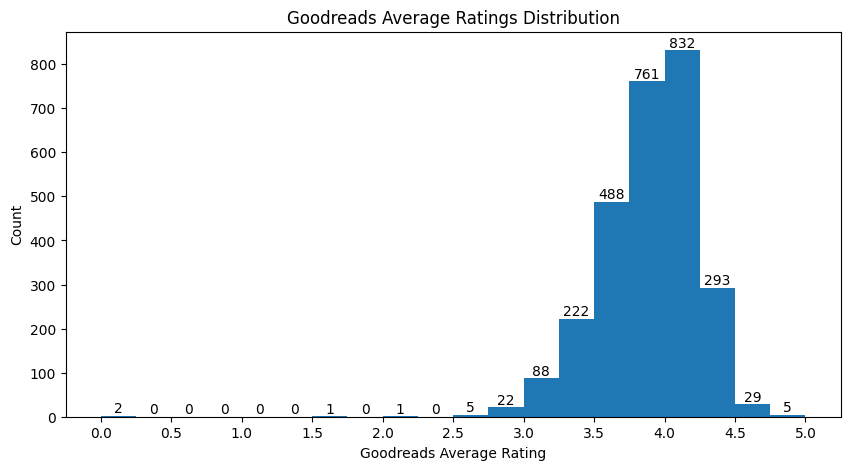

In [14]:
plt.figure(figsize=(10, 5))
counts, edges, bars = plt.hist(conlit_df["goodreads_avg"], bins=np.arange(0, 5.25, 0.25))
plt.bar_label(bars)
plt.xticks(ticks=np.arange(0, 5.25, 0.5))
plt.xlabel("Goodreads Average Rating")
plt.ylabel("Count")
plt.title("Goodreads Average Ratings Distribution")
plt.show()

We can see that our distribution is skewed left, and that the majority of our average goodreads ratings fall between 3 and 4.5

Genre vs Good Reads ratings:

We can perform an ANOVA test to see if there is a difference between the genres:

Null Hypothesis (H0): The mean Goodreads ratings are the same across all genres
Alternative Hypothesis (Ha): At least one genre has a significantly different mean Goodreads rating from the others.

In [15]:
from scipy import stats

df_clean = conlit_df.dropna(subset=['goodreads_avg'])

anova_result = stats.f_oneway(*[df_clean[df_clean['Genre'] == genre]['goodreads_avg'] for genre in df_clean['Genre'].unique()])

anova_result

print(f"ANOVA Test Results:\n")
print(f"F-statistic: {anova_result.statistic:.4f}")
print(f"P-value: {anova_result.pvalue:.4e}")

ANOVA Test Results:

F-statistic: 73.9332
P-value: 7.9727e-146


Since the p-value is so low, we can comfortably reject the null hypothesis. Additionally, the f statistic is very big, indicating a large variance between the means of the different genres.

To visualize the difference between the different genres, we can make a box and whisker plot for each genre to see the distribution.

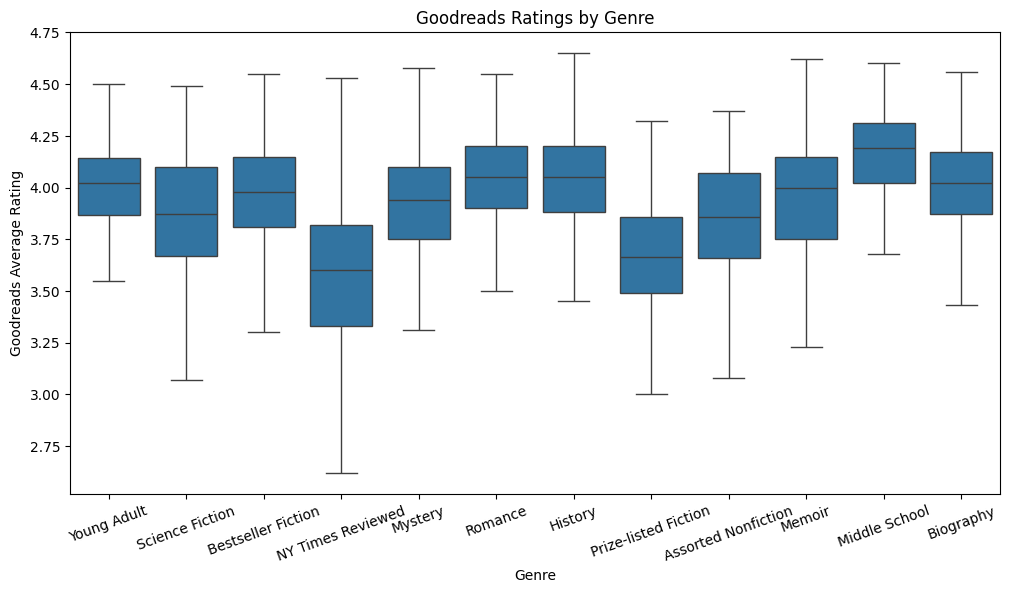

In [16]:
unique_genres = conlit_df["Genre"].dropna().unique()

# Filter dataset to include only books with a listed genre

filtered_df = conlit_df[conlit_df["Genre"].isin(unique_genres)]

# Plot box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x="Genre", y="goodreads_avg", showfliers=False)
plt.xticks(rotation=20)
plt.xlabel("Genre")
plt.ylabel("Goodreads Average Rating")
plt.title("Goodreads Ratings by Genre")
plt.show()

We should also check to see if the total number of ratings correlates to reviews. More highly rated books may be more popular.

In [17]:
correlation = conlit_df['goodreads_avg'].corr(conlit_df['total_ratings'])

print(correlation)

0.13584352308832146


A correlation of 0.1358 suggests a very weak positive relationship between Goodreads' average rating and total ratings. This means that while books with higher ratings may slightly tend to have more total ratings, the relationship is weak and not very predictive.

Lets see how this looks visually:

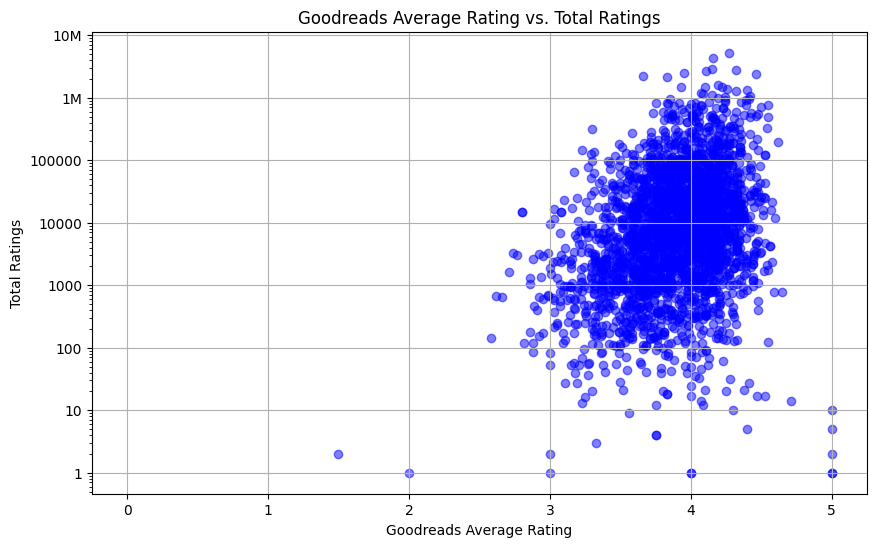

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(conlit_df['goodreads_avg'], conlit_df['total_ratings'], alpha=0.5, color='blue')

plt.ylabel('Total Ratings')
plt.xlabel('Goodreads Average Rating')
plt.title('Goodreads Average Rating vs. Total Ratings')

plt.yscale('log')

plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x/1e6)}M' if x >= 1e6 else f'{int(x)}'))


plt.grid(True)
plt.show()

- Dense Cluster at High Ratings (3.5 - 4.5):
    - Most data points are concentrated between 3.5 and 4.5 average rating.
    - This suggests that most books tend to receive similar ratings, likely due to rating biases (e.g., people mostly rate books they enjoy).

- Logarithmic Scale on Y-axis (Total Ratings):
  - The total ratings range from 1 to over 10 million, meaning there is a huge variation in popularity among books.
  - Most books have far fewer ratings, while a small number of books have exceptionally high ratings.

The scatter plot aligns with the low correlation value (0.1358) because it shows no strong upward trend and a high variance in total ratings across different rating values. While there is a slight positive relationship, it is weak and easily overshadowed by other factors, which is exactly what a correlation value close to zero suggests.

Next we'll see if Goodreads rating differ by author gender.This might be the case if readers have an implicit bias towards a particular gender. We will run a two-sample t-test since we do not know the population standard deviation (Since there are only 8 books where the author's gender is "other", we will not include these books in the test).

Null Hypothesis (H0): The mean Goodreads ratings is the same for both male and female authors.

Alternative Hypothesis (Ha): The mean Goodreads ratings differs for male and female authors.

In [19]:
ttest = stats.ttest_ind(a=conlit_df[conlit_df['Author_Gender']=="M"]['goodreads_avg'], b=conlit_df[conlit_df['Author_Gender']=="F"]['goodreads_avg'])
print("p-value: ", ttest.pvalue)

p-value:  0.2506865511970483


The p-value is 0.25, which is fairly high (greater than 0.05). So we fail to reject the null hypothesis and can conclude that the average goodreads rating is most likely the same/similar for both male and female authors. Let's check this visually with some boxplots.

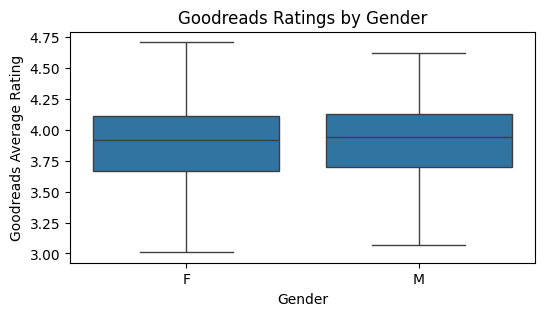

In [20]:
genders_df = conlit_df[(conlit_df["Author_Gender"]=="M") | (conlit_df["Author_Gender"]=="F")]

# Plot box plot
plt.figure(figsize=(6, 3))
sns.boxplot(data=genders_df, x="Author_Gender", y="goodreads_avg", showfliers=False)
plt.xlabel("Gender")
plt.ylabel("Goodreads Average Rating")
plt.title("Goodreads Ratings by Gender")
plt.show()

From the plots above, we can clearly see that the mean and distribution of the average Goodreads rating for male and female authors are indeed quite similar.

Now for fun, let's take a look at this related dataset by the same author:

In [21]:
supersense_df = pd.read_csv("CONLIT_SUPERSENSE.csv")
supersense_df

,file_name,noun.Tops,noun.act,noun.animal,noun.artifact,noun.attribute,noun.body,noun.cognition,noun.communication,noun.event,...,verb.consumption,verb.contact,verb.creation,verb.emotion,verb.motion,verb.perception,verb.possession,verb.social,verb.stative,verb.weather
0,[Heist Society 2] Uncommon Criminals - Ally Ca...,26,533,41,2255,288,792,346,1056,173,...,125,922,93,228,1321,1112,451,585,2001,10
1,"2001_2011_Wilson,RobertCharles_TheChronoliths_...",72,948,115,2946,593,618,715,1343,426,...,177,855,240,432,1235,724,612,866,2752,12
2,"2001_Martel,Yann_LifeofPi_BS.txt",91,1065,1877,3127,962,1805,855,1423,573,...,398,1673,249,458,2139,1179,625,668,4031,22
3,"2002_2011_Anderson,MT_Feed_SF.txt",20,367,111,1565,154,892,221,705,133,...,106,837,147,330,1271,732,336,454,1939,9
4,"2002_Baker,Jo_Offcomer_CT.txt",29,419,96,3826,312,1961,235,791,207,...,136,1867,93,288,2157,1328,339,431,1823,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2749,"Woman Behind the New Deal, The - Kirstin Downe...",54,3500,57,2129,988,309,1672,2937,643,...,289,673,701,916,1368,825,1413,3296,3664,3
2750,"Woman of No Importance, A - Sonia Purnell.txt",43,2575,102,2856,800,402,938,1870,439,...,246,824,371,479,1648,664,1055,1953,3142,5
2751,"Woodrow Wilson - John Milton Cooper, Jr_.txt",124,7081,58,2423,2451,515,4100,7982,1450,...,408,942,1136,1491,1863,1190,1830,4697,6545,4
2752,You Never Forget Your First - Alexis Coe.txt,18,921,84,714,385,176,434,1181,212,...,111,278,207,268,539,260,613,894,1508,2


The dataset contains counts for various different types of words in each book. For example, values under the column "noun.animal" indicate the number of times a noun relating to an animal appeared in the book. These are the same books listed in our original dataset. Let's go ahead and created a merged dataset that includes the book titles, average goodreads, rating, and supersenses.

In [22]:
supersense_df = supersense_df.rename(columns={'file_name': 'ID'})
merged_df = pd.merge(conlit_df.loc[:, ['ID', 'goodreads_avg']], supersense_df, on="ID")
merged_df

,ID,goodreads_avg,noun.Tops,noun.act,noun.animal,noun.artifact,noun.attribute,noun.body,noun.cognition,noun.communication,...,verb.consumption,verb.contact,verb.creation,verb.emotion,verb.motion,verb.perception,verb.possession,verb.social,verb.stative,verb.weather
0,[Heist Society 2] Uncommon Criminals - Ally Ca...,4.13,26,533,41,2255,288,792,346,1056,...,125,922,93,228,1321,1112,451,585,2001,10
1,"2001_2011_Wilson,RobertCharles_TheChronoliths_...",3.67,72,948,115,2946,593,618,715,1343,...,177,855,240,432,1235,724,612,866,2752,12
2,"2001_Martel,Yann_LifeofPi_BS.txt",3.93,91,1065,1877,3127,962,1805,855,1423,...,398,1673,249,458,2139,1179,625,668,4031,22
3,"2002_2011_Anderson,MT_Feed_SF.txt",3.56,20,367,111,1565,154,892,221,705,...,106,837,147,330,1271,732,336,454,1939,9
4,"2002_Baker,Jo_Offcomer_CT.txt",2.58,29,419,96,3826,312,1961,235,791,...,136,1867,93,288,2157,1328,339,431,1823,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,"Woman Behind the New Deal, The - Kirstin Downe...",4.22,54,3500,57,2129,988,309,1672,2937,...,289,673,701,916,1368,825,1413,3296,3664,3
2745,"Woman of No Importance, A - Sonia Purnell.txt",4.12,43,2575,102,2856,800,402,938,1870,...,246,824,371,479,1648,664,1055,1953,3142,5
2746,"Woodrow Wilson - John Milton Cooper, Jr_.txt",3.82,124,7081,58,2423,2451,515,4100,7982,...,408,942,1136,1491,1863,1190,1830,4697,6545,4
2747,You Never Forget Your First - Alexis Coe.txt,3.75,18,921,84,714,385,176,434,1181,...,111,278,207,268,539,260,613,894,1508,2


Note that we have no missing data.

In [23]:
merged_df.isna().sum()[lambda x: x != 0]

,0


Now let's see if there's a correlation between any of these word counts and average goodreads rating.



In [24]:
count = 0
merged_df2 = merged_df.drop(columns=["ID"])
for columnName in merged_df2:
    print('Column Name : ', columnName)
    correlation = merged_df2['goodreads_avg'].corr(merged_df2[columnName])
    print('Correlation : ', correlation, "\n")
    if abs(correlation)>0.4: count +=1
print("Number of columns with correlation >0.5 or <-0.5: ", count)

Column Name :  goodreads_avg
Correlation :  0.9999999999999999 

Column Name :  noun.Tops
Correlation :  0.02865401427333786 

Column Name :  noun.act
Correlation :  0.19297054205818012 

Column Name :  noun.animal
Correlation :  0.0035675811751583806 

Column Name :  noun.artifact
Correlation :  0.05130091694613739 

Column Name :  noun.attribute
Correlation :  0.09742311130182085 

Column Name :  noun.body
Correlation :  0.07280649150182102 

Column Name :  noun.cognition
Correlation :  0.10079793882798227 

Column Name :  noun.communication
Correlation :  0.13159359274465768 

Column Name :  noun.event
Correlation :  0.17495994548359492 

Column Name :  noun.feeling
Correlation :  0.07439394733750432 

Column Name :  noun.food
Correlation :  -0.07887913726594392 

Column Name :  noun.group
Correlation :  0.17704509748636563 

Column Name :  noun.location
Correlation :  0.15992888163296384 

Column Name :  noun.motive
Correlation :  0.1047925760633181 

Column Name :  noun.object
Cor

Unfortunately, it doesn't seem like any of our word supersenses correlate to goodreads ratings (The one column that had a strong correlation was the goodreads_avg correlating with itself).




In [25]:
count = 0
quantitative_conlit = conlit_df.loc[:, quantitative_cols]

for columnName in quantitative_conlit:
    for columnName2 in quantitative_conlit:
      print(columnName, columnName2)
      correlation = quantitative_conlit[columnName].corr(quantitative_conlit[columnName2])
      print('Correlation : ', correlation, "\n")
    if abs(correlation)>0.4: count +=1
print("Number of columns with correlation >0.5 or <-0.5: ", count)

Pubdate Pubdate
Correlation :  1.0 

Pubdate token_count
Correlation :  -0.1257582857104987 

Pubdate total_characters
Correlation :  -0.13036211971090975 

Pubdate protagonist_concentration
Correlation :  0.07583455790788236 

Pubdate avg_sentence_length
Correlation :  -0.12365972126839962 

Pubdate avg_word_length
Correlation :  -0.11423562815438829 

Pubdate tuldava_score
Correlation :  -0.1340300942344694 

Pubdate event_count
Correlation :  -0.049733985518312755 

Pubdate speed_avg
Correlation :  -0.08716054691924002 

Pubdate circuitousness
Correlation :  0.030429116895152458 

Pubdate speed_min
Correlation :  -0.11083674899310415 

Pubdate volume
Correlation :  0.021456072551941242 

Pubdate goodreads_avg
Correlation :  0.04197625727818718 

Pubdate total_ratings
Correlation :  -0.13612368307647627 

token_count Pubdate
Correlation :  -0.1257582857104987 

token_count token_count
Correlation :  1.0 

token_count total_characters
Correlation :  0.7625146011614863 

token_count pr

We will be doing PCA analysis inorder to possibly come up with more helpful features since our current correlations are quite sad.

# ML Algorithm Preprocessing

encoding and normalizing

In [26]:
winner_shortlist_mapping = {
    "Winner": 2,
    "Shortlist": 1,
    "NoPrize": 0
}
proportions = (conlit_df.groupby("Genre").size()) / (len(conlit_df))

conlit_df.drop(columns=["ID"], inplace=True)
conlit_df["WinnerShortlist"] = conlit_df["WinnerShortlist"].map(winner_shortlist_mapping)
conlit_df = pd.get_dummies(conlit_df, columns=["Category", "Author_Gender"], dtype=int)
conlit_df["Genre"] = conlit_df["Genre"].apply(lambda x: proportions[x])

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X, y = conlit_df.drop(columns=["goodreads_avg"]), conlit_df["goodreads_avg"]
X_scaled = scaler.fit_transform(X)

PCA

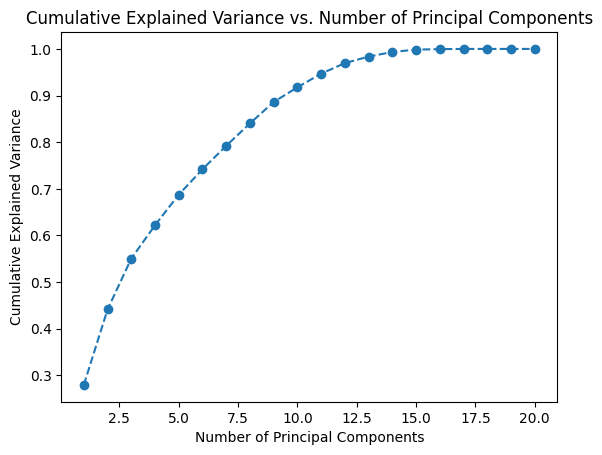

In [28]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.show()

In [29]:
pca = PCA(n_components=10, random_state=42)
X_pca = pca.fit_transform(X_scaled)

## Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

degrees = list(range(2, 8))

for d in degrees:
  model = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())
  model.fit(X_train, y_train)

  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  train_mse = mean_squared_error(y_train, y_train_pred)
  test_mse = mean_squared_error(y_test, y_test_pred)
  train_r2 = r2_score(y_train, y_train_pred)
  test_r2 = r2_score(y_test, y_test_pred)

  print(f"Degree: {d}")
  print(f"Training - MSE: {train_mse:.4f}, R^2: {train_r2:.4f}")
  print(f"Testing - MSE: {test_mse:.4f}, R^2: {test_r2:.4f}\n")

Degree: 2
Training - MSE: 0.0803, R^2: 0.3142
Testing - MSE: 2.0957, R^2: -12.8387

Degree: 3
Training - MSE: 0.0688, R^2: 0.4124
Testing - MSE: 1326323.9193, R^2: -8758280.6833

Degree: 4
Training - MSE: 0.0388, R^2: 0.6686
Testing - MSE: 17468617402751.3750, R^2: -115352720101025.1562

Degree: 5
Training - MSE: 0.0000, R^2: 1.0000
Testing - MSE: 14577870067.9760, R^2: -96263884360.8787



so sad :(

In [ ]:
from sklearn.linear_model import Lasso, Ridge

alphas = [1e-4, 1e-3, 1e-2, 1, 5]

def test(model, degree, alpha, X_train, y_train):
  model.fit(X_train, y_train)

  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  train_mse = mean_squared_error(y_train, y_train_pred)
  test_mse = mean_squared_error(y_test, y_test_pred)
  train_r2 = r2_score(y_train, y_train_pred)
  test_r2 = r2_score(y_test, y_test_pred)

  print("{:10}{:10}{:25}{:25}{:25}{:25}".format(
      degree, alpha, train_mse, train_r2, test_mse, test_r2
  ))


print("\n*** Lasso ***")
print("{:>10}{:>10}{:>25}{:>25}{:>25}{:>25}".format(
    "Degree", "Alpha", "Train MSE", "Train R2", "Test MSE", "Test R2"
))
for d in degrees:
  for a in alphas:
    model = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())
    test(model, d, a, X_train, y_train)


print("*** Ridge ***")
print("{:>10}{:>10}{:>25}{:>25}{:>25}{:>25}".format(
    "Degree", "Alpha", "Train MSE", "Train R2", "Test MSE", "Test R2"
))
for d in degrees:
  for a in alphas:
    model = make_pipeline(PolynomialFeatures(degree=d), Lasso(alpha=a))
    test(model, d, a, X_train, y_train)

## Neural Networks pt. 1

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# batch_size = train_loader.batch_size
# num_train_data = len(train_loader) * batch_size
# num_test_data = len(test_loader) * batch_size
# feat_dim = train_loader.dataset[0][0].shape[0]

model 1

In [ ]:
class ThreeLPModel(nn.Module):
    def __init__(self):
        super(ThreeLPModel, self).__init__()
        self.layer1 = nn.Linear(10, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        return torch.relu(self.layer3(x))

In [ ]:
three_layer_model = ThreeLPModel()

criterion = nn.MSELoss()
optimizer = optim.Adam(three_layer_model.parameters())

epochs = 100
losses = []
for epoch in range(epochs):
    running_loss = 0.0
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Forward pass
        pred = three_layer_model(data)
        loss = criterion(pred, targets)
        # Backward pass
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    losses.append(loss.item())
    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

In [ ]:
test_loss = 0.0
for batch_idx, (data, targets) in enumerate(test_loader):
    loss = criterion(three_layer_model(data), targets)
    test_loss += loss.item()
test_loss = test_loss / len(test_loader)

train_loss = 0.0
for batch_idx, (data, targets) in enumerate(train_loader):
    loss = criterion(three_layer_model(data), targets)
    train_loss += loss.item()
train_loss = train_loss / len(train_loader)

print("Train Loss:", train_loss)
print("Test Loss:", test_loss)

plt.plot(losses)
plt.title("Losses over Time")
plt.xlabel("Time")
plt.ylabel("Loss (MSE)")
plt.show()

model 2

In [ ]:
class FourLPModel(nn.Module):
    def __init__(self):
        super(FourLPModel, self).__init__()
        self.layer1 = nn.Linear(10, 128)
        self.layer2 = nn.Linear(128, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        return torch.relu(self.layer4(x))

In [ ]:
four_layer_model = FourLPModel()

criterion = nn.MSELoss()
optimizer = optim.Adam(four_layer_model.parameters())

epochs = 100
losses = []
for epoch in range(epochs):
    running_loss = 0.0
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Forward pass
        pred = four_layer_model(data)
        loss = criterion(pred, targets)
        # Backward pass
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    losses.append(loss.item())
    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

In [ ]:
test_loss = 0.0
for batch_idx, (data, targets) in enumerate(test_loader):
    loss = criterion(four_layer_model(data), targets)
    test_loss += loss.item()
test_loss = test_loss / len(test_loader)

train_loss = 0.0
for batch_idx, (data, targets) in enumerate(train_loader):
    loss = criterion(four_layer_model(data), targets)
    train_loss += loss.item()
train_loss = train_loss / len(train_loader)

print("Train Loss:", train_loss)
print("Test Loss:", test_loss)

plt.plot(losses)
plt.title("Losses over Time")
plt.xlabel("Time")
plt.ylabel("Loss (MSE)")
plt.show()

model 3

In [ ]:
class BigModel(nn.Module):
    def __init__(self):
        super(BigModel, self).__init__()
        self.layer1 = nn.Linear(10, 512)
        self.layer2 = nn.Linear(512, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        return torch.relu(self.layer4(x))

In [ ]:
big_model = BigModel()

criterion = nn.MSELoss()
optimizer = optim.Adam(big_model.parameters())

epochs = 100
losses = []
for epoch in range(epochs):
    running_loss = 0.0
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Forward pass
        pred = big_model(data)
        loss = criterion(pred, targets)
        # Backward pass
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    losses.append(loss.item())
    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

In [ ]:
test_loss = 0.0
for batch_idx, (data, targets) in enumerate(test_loader):
    loss = criterion(big_model(data), targets)
    test_loss += loss.item()
test_loss = test_loss / len(test_loader)

train_loss = 0.0
for batch_idx, (data, targets) in enumerate(train_loader):
    loss = criterion(big_model(data), targets)
    train_loss += loss.item()
train_loss = train_loss / len(train_loader)

print("Train Loss:", train_loss)
print("Test Loss:", test_loss)

plt.plot(losses)
plt.title("Losses over Time")
plt.xlabel("Time")
plt.ylabel("Loss (MSE)")
plt.show()

visualization

In [ ]:
models = {
  "Three Layer": three_layer_model(X_test_tensor),
  "Four Layer": four_layer_model(X_test_tensor),
  "Big": big_model(X_test_tensor)
}

for key in models.keys():
  results = pd.DataFrame({
      "Predicted": [x[0] for x in models[key].detach().numpy()],
      "Actual": y_test
  })

  plt.scatter(results["Actual"], results["Predicted"], alpha=0.5)
  plt.xlim(3, 5)
  plt.ylim(3, 5)
  plt.xlabel("Actual")
  plt.ylabel("Predicted")
  plt.title(key)
  plt.show()

## Neural Networks pt. 2

In [ ]:
class NineLPModel(nn.Module):
    def __init__(self):
        super(NineLPModel, self).__init__()
        self.layer1 = nn.Linear(10, 128)
        self.layer2 = nn.Linear(128, 512)
        self.layer3 = nn.Linear(512, 1024)
        self.layer4 = nn.Linear(1024, 1024)
        self.layer5 = nn.Linear(1024, 512)
        self.layer6 = nn.Linear(512, 128)
        self.layer7 = nn.Linear(128, 64)
        self.layer8 = nn.Linear(64, 32)
        self.layer9 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = torch.relu(self.layer4(x))
        x = torch.relu(self.layer5(x))
        x = torch.relu(self.layer6(x))
        x = torch.relu(self.layer7(x))
        x = torch.relu(self.layer8(x))
        return torch.relu(self.layer9(x))

nine_layer_model = NineLPModel()

criterion = nn.HuberLoss()
optimizer = optim.Adam(nine_layer_model.parameters())

epochs = 100
losses = []
for epoch in range(epochs):
    running_loss = 0.0
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Forward pass
        pred = nine_layer_model(data)
        loss = criterion(pred, targets)
        # Backward pass
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    losses.append(loss.item())
    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

In [ ]:
test_loss = 0.0
for batch_idx, (data, targets) in enumerate(test_loader):
    loss = criterion(nine_layer_model(data), targets)
    test_loss += loss.item()
test_loss = test_loss / len(test_loader)

train_loss = 0.0
for batch_idx, (data, targets) in enumerate(train_loader):
    loss = criterion(nine_layer_model(data), targets)
    train_loss += loss.item()
train_loss = train_loss / len(train_loader)

print("Train Loss:", train_loss)
print("Test Loss:", test_loss)

plt.plot(losses)
plt.title("Losses over Time")
plt.xlabel("Time")
plt.ylabel("Loss (MSE)")
plt.show()

In [ ]:
pred = [x[0] for x in nine_layer_model.forward(X_test_tensor).detach().numpy()]

plt.scatter(y_test, pred, alpha=0.5)
plt.xlim(3, 5)
plt.ylim(3, 5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Nine Layer")
plt.show()

In [ ]:
class TinyModel(nn.Module):
    def __init__(self):
        super(TinyModel, self).__init__()
        self.layer1 = nn.Linear(10, 10)
        self.layer2 = nn.Linear(10, 5)
        self.layer3 = nn.Linear(5, 1)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        return torch.relu(self.layer3(x))

tiny_model = TinyModel()

criterion = nn.HuberLoss()
optimizer = optim.Adam(tiny_model.parameters())

epochs = 100
losses = []
for epoch in range(epochs):
    running_loss = 0.0
    for batch_idx, (data, targets) in enumerate(train_loader):
        # Forward pass
        pred = tiny_model(data)
        loss = criterion(pred, targets)
        # Backward pass
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    losses.append(loss.item())
    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

In [ ]:
test_loss = 0.0
for batch_idx, (data, targets) in enumerate(test_loader):
    loss = criterion(tiny_model(data), targets)
    test_loss += loss.item()
test_loss = test_loss / len(test_loader)

train_loss = 0.0
for batch_idx, (data, targets) in enumerate(train_loader):
    loss = criterion(tiny_model(data), targets)
    train_loss += loss.item()
train_loss = train_loss / len(train_loader)

print("Train Loss:", train_loss)
print("Test Loss:", test_loss)

plt.plot(losses)
plt.title("Losses over Time")
plt.xlabel("Time")
plt.ylabel("Loss (MSE)")
plt.show()

In [ ]:
pred = [x[0] for x in tiny_model.forward(X_test_tensor).detach().numpy()]

plt.scatter(y_test, pred, alpha=0.5)
plt.xlim(3, 5)
plt.ylim(3, 5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Tiny Model")
plt.show()